In [40]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
from google.colab import files
uploaded=files.upload()

Saving car data.csv to car data (1).csv


In [42]:
df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [43]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [44]:
df.shape

(301, 9)

In [45]:
df.shape[0]

301

In [46]:
df.shape[1]

9

**Quick glance at Data**

In [47]:
# shape and data types of the data

print(df.dtypes)

print()
# select numeric columns
print('Numerical columns:\n')
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns

print('Categorical columns:\n')
df_cat = df.select_dtypes(exclude=[np.number])
cat = df_cat.columns.values
print(cat)

print()
print('Shape of this df is:')
print(df.shape)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

Numerical columns:

['Year' 'Selling_Price' 'Present_Price' 'Kms_Driven' 'Owner']
Categorical columns:

['Car_Name' 'Fuel_Type' 'Seller_Type' 'Transmission']

Shape of this df is:
(301, 9)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [49]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [50]:
#Just a minor Feature Engeneering to get the Car's age:
df["Car_Age"] = 2021 - df['Year']
df.drop('Year',axis=1,inplace = True)

**My Hypothesis**

It is a good idea to have some thoughts about the project before taking any exploratory data analysis actions.

My hypothesis was that the car's Age (column Year) would influence the Selling Price the most

In [51]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


# **Exploratory Data Analysis(EDA)**

In [52]:
#Car_Name column is not very usefull
df.drop('Car_Name', axis = 1, inplace = True)

In [53]:
df.columns


Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Car_Age'],
      dtype='object')

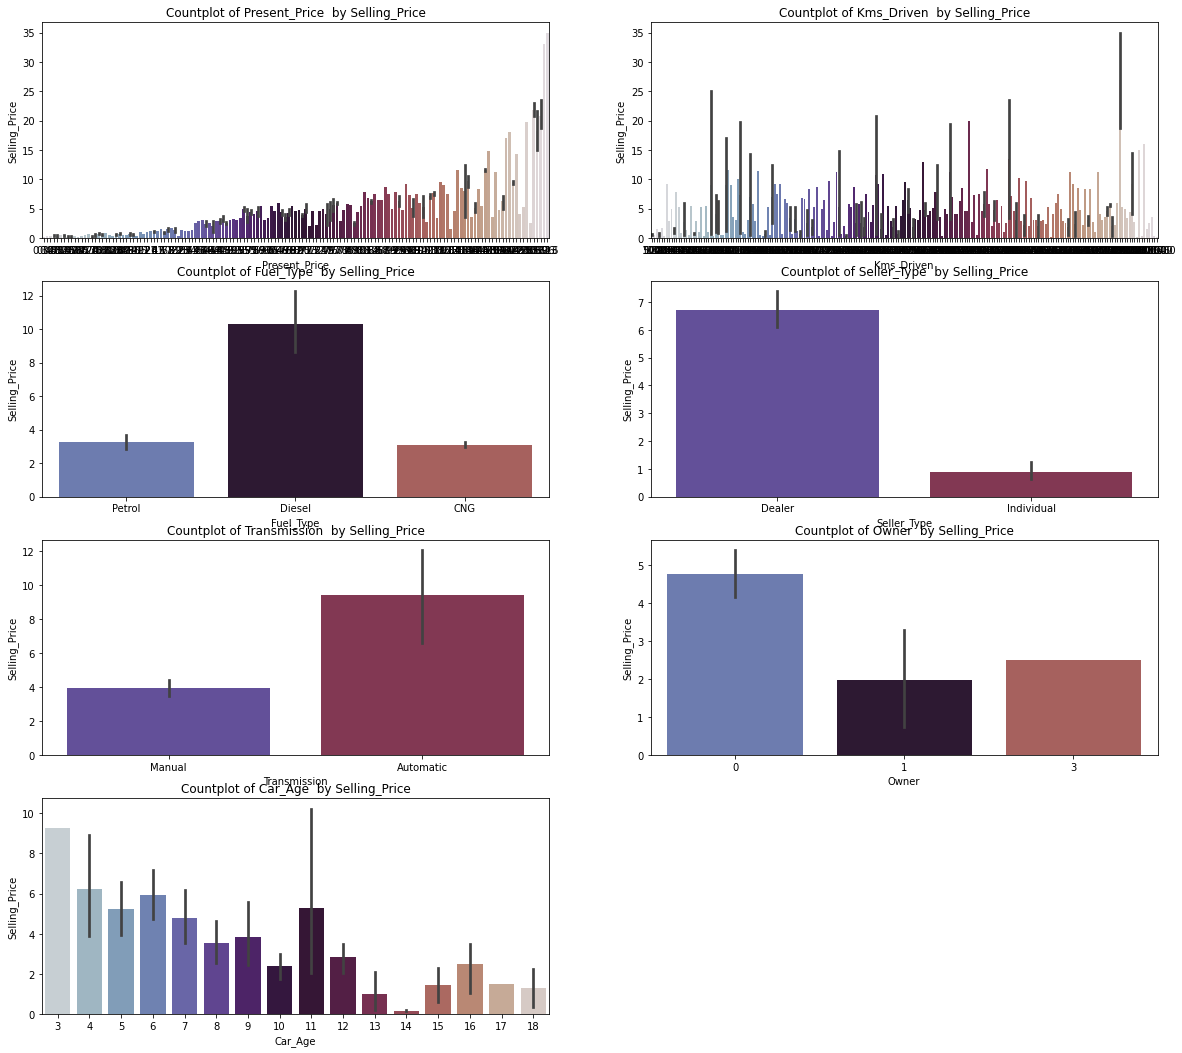

In [54]:
#Frequency of each category separated by label
plt.figure(figsize=[20,23])
feafures = df.columns[1:]
#take all columns except the target Selling_Price
n=1
for f in feafures:
    plt.subplot(5,2,n)
    sns.barplot(x=f,  y= 'Selling_Price', data=df,palette='twilight')
    plt.title("Countplot of {}  by Selling_Price".format(f))
    n=n+1
#plt.tight_layout()
#plt.show()

# **Summary** **of** **EDA** **analysis**: how the independent features influence the dependent feature (Selling_Price)

Present_Price: as Present_Price increases, Selling_Price increases, even though the increase is kind of steep at the end, overall it shows a linear correlation.

Kms_Driven: no correlation was found.

Fuel_Type: Car's with diesel is much more expensive than those with Petrol and CNG around 3 times

Seller_Type: Car's sold by dealer have higher Selling_Price than the individual sellers by 700% 4. 5. Transmission: Automatic transmission costs more than Manual more than 2 times! Owner: Not used cars cost more than those who have owners

Car_Age: unsurprisingly, old cars cost less than brand new

Let's look at the corellation plot of all variables

To do that let's change the categorical variables to the one hot encoded (numeric), so we can calculate the correlation matrix.

In [55]:
#getting the one hot encode variables
df = pd.get_dummies(data = df,drop_first=True) 

In [56]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [57]:
df.corr() #returns dataframe

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


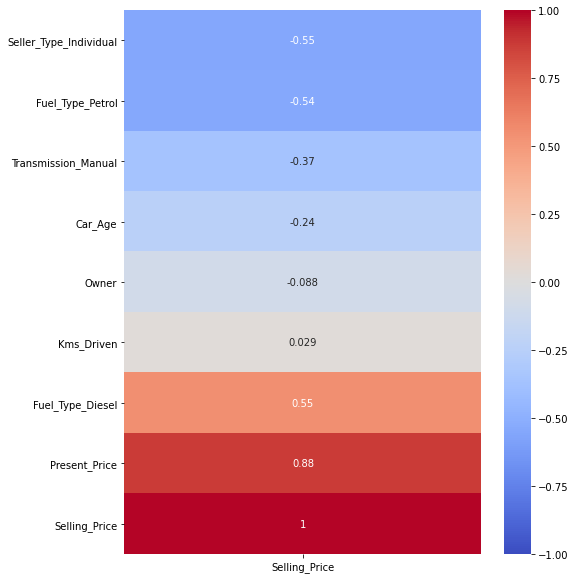

In [58]:
#calculating the correlation matrix
plt.figure(figsize=(8, 10))
sns.heatmap(df.corr()[['Selling_Price']].sort_values(by='Selling_Price'), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 

I have used the cutoff of 0.5 as a general approach to classify the variables importance based on the correlation matrix.

We can group features that a have positive correlation with Selling_Price: Fuel_Type_Diesel and Present_Price (with more than +0.5) and the negatively correlated (with less than -0.5): Seller_Type and Petrol_Type_Diesel are the most important independent features for the lineqr model. Other features such as Transmission_Manual and Car_Age (0 - 0.5) showed lesser correlation with Selling_Price  and, thus will be dropped.



# Feature Selection
For now, we have a rough idea of variables that are positively and negatively correlated with the target feature. To make final decision, which variables from highly correlated we will use for our model, we need to access the strength of the "true" correlation between predictors by using the Variance Inflation Factor (VIF), which can give us a cleart idea of how these features explain and discribe the "inflated" variance.



In [59]:
# We see that there is a multicollinearity between the selected independent variables
#We need to check the inflation factor to make sure we can use the features

#Lets drop the target dependent feature
X = df.drop('Selling_Price', axis = 1)

#Lets scale the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_st = sc.fit_transform(X)
#X_test_std = sc_x.transform(X_test)


# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_train_st, i) for i in range(X_train_st.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Fuel_Type_Diesel,25.18
5,Fuel_Type_Petrol,25.03
0,Present_Price,1.84
1,Kms_Driven,1.52
3,Car_Age,1.48
6,Seller_Type_Individual,1.45
7,Transmission_Manual,1.20
2,Owner,1.06


VIF must of each variable must be less than 5, or ideally less than 2, for the safety of predictions, ref_here. Thus we have to drop the most "Inflated" variable (Fuel_Type_Diesel) and assess the set of predictors (independent features) again.

In [60]:
X = df.drop(columns = ['Fuel_Type_Diesel', 'Selling_Price'], axis = 1)

In [61]:
#Lets scale the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_st = sc.fit_transform(X)
#X_test_std = sc_x.transform(X_test)

In [62]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [63]:
# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_train_st, i) for i in range(X_train_st.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Present_Price,1.82
1,Kms_Driven,1.52
3,Car_Age,1.48
5,Seller_Type_Individual,1.45
4,Fuel_Type_Petrol,1.36
6,Transmission_Manual,1.20
2,Owner,1.06


Great! all features have VIF of less than 2. For now, we can drop the uncorrelated columns as Kms_Driven and those that have less than +0.5 and more than -0.5 according to the correlation matrix:

I do not want to use many variables for the model because I want to train it to generalize better and not to overfit the test dataset

In [64]:
df1 = df.drop(columns = ['Kms_Driven','Owner', 'Car_Age',  'Fuel_Type_Diesel', 'Transmission_Manual'])

So, now we have only three major predictors: Seller_Type, Fuel_Type, and Present_Price. Let's check the distribution of these, so we can check for the outliers that might affect our model, for Selling_Price and Present_Price, as others are just frequency features.

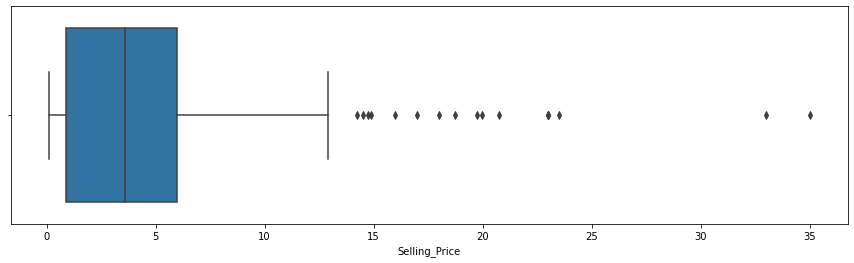

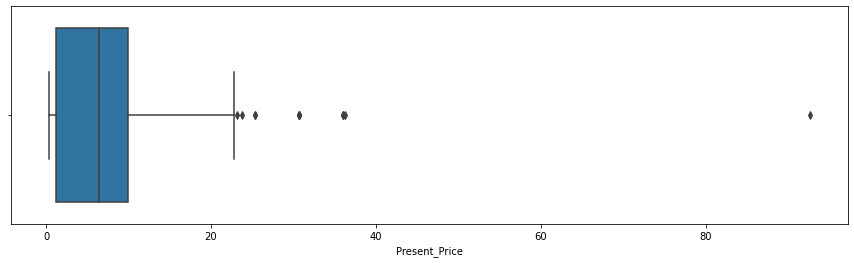

In [65]:
num_cols = ['Selling_Price','Present_Price']

for i in range(2):
    fig = plt.figure(figsize=[15,4])

    sns.boxplot(x=num_cols[i], data=df)

  
    
    plt.show()

**Feature Engineering**
We see that data is rightly skewed, thus we need to correct for the outliers on the right side of the boxplot. There are some general strategies for dealing with the outliers:

1.Dropping (I do not like it because we lose some information that night be important). You can drop them if that makes perfect sense: like Age of a person that is more than 200 years old!

2.Imputing outliers to the right end of the distribution (That is what we will do)

3.Grouping the outliers in a separate dataset or creating a feature from the outliers that can be added to the dataset along with the other independent variables.

In [66]:
#calculating the Interquartile range of Selling_Price
IQR=df1.Selling_Price.quantile(0.75)-df1.Selling_Price.quantile(0.25)

#calculating the borders of the normal distribution of Selling_Price
lower_bridge=df1['Selling_Price'].quantile(0.25)-(IQR*1.5)
upper_bridge=df1['Selling_Price'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Selling_Price
df1.loc[df1['Selling_Price']>=upper_bridge,'Selling_Price']=upper_bridge

In [67]:
#calculating the Interquartile range of Present_Price
IQR=df1.Present_Price.quantile(0.75)-df.Present_Price.quantile(0.25)

#calculating the borders of the normal distribution of Present_Price
lower_bridge=df1['Present_Price'].quantile(0.25)-(IQR*1.5)
upper_bridge=df1['Present_Price'].quantile(0.75)+(IQR*1.5)

#Inpute the outliers with the max values that are present for the normal distribution of Present_Price
df1.loc[df1['Present_Price']>=upper_bridge,'Present_Price']=upper_bridge

Lets check again whether we got the outliers out of our dist or not

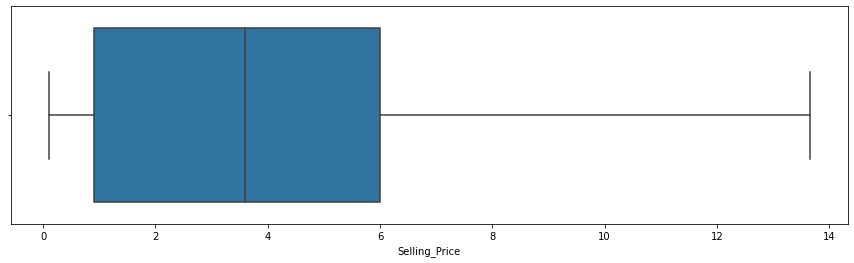

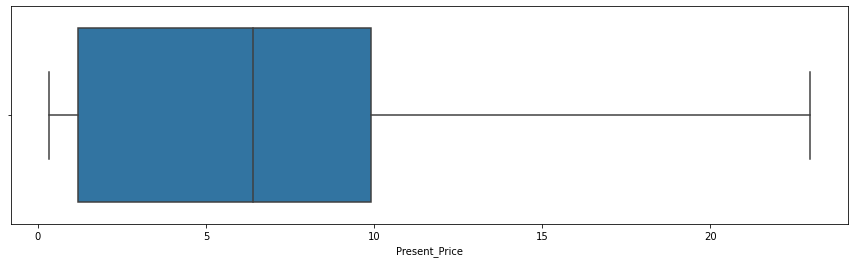

In [68]:
num_cols = ['Selling_Price','Present_Price']

for i in range(2):
    fig = plt.figure(figsize=[15,4])

    sns.boxplot(x=num_cols[i], data=df1)

  
    
    plt.show()


Our outliers are now at the right border of the upper quartile: around 6 for Selling_Price and around 10 for Present_Price respectively.

Lets start the model builing with our dataset!

# **Model Building**


In [69]:
df1.head()


,Selling_Price,Present_Price,Fuel_Type_Petrol,Seller_Type_Individual
0,3.35,5.59,1,0
1,4.75,9.54,0,0
2,7.25,9.85,1,0
3,2.85,4.15,1,0
4,4.60,6.87,0,0


This reduced dataset(df1) we will use for the Selling_Price prediction

In [70]:
# Separating target variable and its features
y = df1['Selling_Price']
X = df1.drop('Selling_Price',axis=1)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 3)
x test:  (61, 3)
y train:  (240,)
y test:  (61,)


We need to scale features because some of the regression algorithms as Linear, Lasso, Ridge, KNN require scaling

In [71]:
#uploading Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [72]:
#uploading all necessary models that we will apply for this dataset 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import  XGBRegressor

In [73]:
#creating a dictionary of the models(estimators) 
estimators = {
    'Linear Regression': [LinearRegression()],
    'Lasso' :[Lasso()],
    'Ridge' :[Ridge()],
    'KNN' :[KNeighborsRegressor()],
    'Decision Tree' :[DecisionTreeRegressor()],
    'Ransom Forest' :[RandomForestRegressor()],
    'XG Boost': [XGBRegressor()],
}

#writing a function to fit models above to the train dataset
def mfit(estimators, X_train_st, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train_st, y_train)
        print(m+' fitted')

mfit(estimators, X_train_st, y_train)

Linear Regression fitted
Lasso fitted
Ridge fitted
KNN fitted
Decision Tree fitted
Ransom Forest fitted
[18:47:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG Boost fitted


In [74]:
import sklearn.metrics as metrics

#applying the fitted models to the test dataset
def mpredict(estimators, X_test_st, y_test):
    outcome = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test_st)
        outcome[m] = [round(metrics.r2_score(y_test, y_pred), 2), 
                      metrics.mean_absolute_error(y_test, y_pred),
                     
                     metrics.mean_squared_error(y_test, y_pred),
                     np.sqrt(metrics.mean_squared_error(y_test, y_pred))]
    return outcome

outcome = mpredict(estimators, X_test_st, y_test)

In [75]:
#printing the regression errors as metrics for the model evaluation
for m in outcome:
    print('------------------------'+m+'------------------------')
    print('R2 score', round(outcome[m][0],2))
    print('MAE', round(outcome[m][1],2))
    print('MSE', round(outcome[m][2],2))
    print('RMSE', round(outcome[m][3],2))

------------------------Linear Regression------------------------
R2 score 0.76
MAE 0.99
MSE 3.03
RMSE 1.74
------------------------Lasso------------------------
R2 score 0.65
MAE 1.61
MSE 4.48
RMSE 2.12
------------------------Ridge------------------------
R2 score 0.77
MAE 0.99
MSE 3.01
RMSE 1.74
------------------------KNN------------------------
R2 score 0.79
MAE 0.92
MSE 2.73
RMSE 1.65
------------------------Decision Tree------------------------
R2 score 0.74
MAE 0.95
MSE 3.32
RMSE 1.82
------------------------Ransom Forest------------------------
R2 score 0.78
MAE 0.93
MSE 2.88
RMSE 1.7
------------------------XG Boost------------------------
R2 score 0.78
MAE 0.83
MSE 2.82
RMSE 1.68


Among all model KNN method score not only the highest r2 values, but at the same time the lowest MAE, MSE, RMSE

Now , lets do the hyperparaemter tuning for this method



# **Hyperparameter Optimization**

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
model = KNeighborsRegressor()




# Select an algorithm
algorithm = KNeighborsRegressor()

# Create 3 folds. We will use 3 fold cross validation
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)


# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10], 'weights': ['uniform','distance']}]


# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train_st, y_train)


# Get the results
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')
{'n_neighbors': 8, 'weights': 'uniform'}


As you can see, the best hyperparameters we get are {'n_neighbors': 8, 'weights': 'uniform'}. Thus,lets use these exact parameters for our KNN model and see how that would affect MAE, MSE, RMSE, and R2 score.

In [77]:
KNN = KNeighborsRegressor(n_neighbors = 8, weights = 'uniform')
KNN.fit(X_train_st, y_train)

pred = KNN.predict(X_test_st)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("R2 score =", round(metrics.r2_score(y_test, pred), 2))

MAE: 0.876188524590164
MSE: 2.1823295594262295
RMSE: 1.4772709837488278
R2 score = 0.83


Yes! We not only improved the R2 score from 0.79 to 0.83, but at the same time further minimized the errors

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


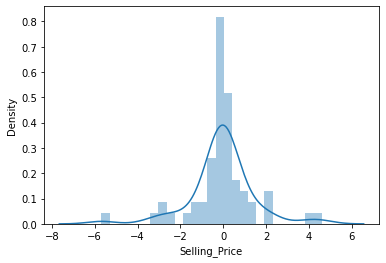

In [78]:
#lest check how the predicted values(pred) are correlated with the sample data(y_test)

sns.distplot(y_test-pred)

Looks like the distribution of predictors strongly resembles the actual one of the test dataset.

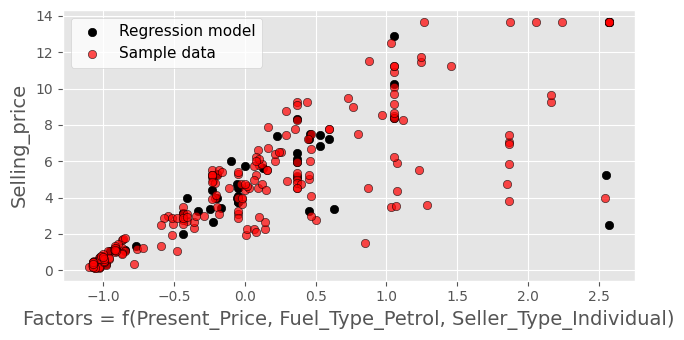

In [79]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.scatter(X_test_st[:,0], y_test, color='k', label='Regression model')
ax.scatter(X_train_st[:,0], y_train, edgecolor='k', facecolor='red', alpha=0.7, label='Sample data')
ax.set_ylabel('Selling_price', fontsize=14)
ax.set_xlabel('Factors = f(Present_Price, Fuel_Type_Petrol, Seller_Type_Individual)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

fig.tight_layout()

In [80]:
df1.head()


,Selling_Price,Present_Price,Fuel_Type_Petrol,Seller_Type_Individual
0,3.35,5.59,1,0
1,4.75,9.54,0,0
2,7.25,9.85,1,0
3,2.85,4.15,1,0
4,4.60,6.87,0,0


# **Model_Evaluation**

**There are four key assumptions that need to be tested for a linear regression model:**

1.**Linearity:** The expected value of the dependent variable is a linear function of each independent variable, holding the others fixed (note this does not restrict you to use a nonlinear transformation of the independent variables i.e. you can still model f(x) = ax² + bx + c, using both x² and x as predicting variables.

2.**Independence:** The errors (residuals of the fitted model) are independent of each other.

3.**Homoscedasticity** (constant variance): The variance of the errors is constant with respect to the predicting variables or the response.

4.**Normality**: The errors are generated from a Normal distribution (of unknown mean and variance, which can be estimated from the data). Note, this is not a necessary condition to perform linear regression unlike the top three above. However, without this assumption being satisfied, you cannot calculate the so-called ‘confidence’ or ‘prediction’ intervals easily as the well-known analytical expressions corresponding to Gaussian distribution cannot be used. Ref






In [81]:
df1.head()

,Selling_Price,Present_Price,Fuel_Type_Petrol,Seller_Type_Individual
0,3.35,5.59,1,0
1,4.75,9.54,0,0
2,7.25,9.85,1,0
3,2.85,4.15,1,0
4,4.60,6.87,0,0


At first, from the final dataset (df1) we need to create a linear model and assess it with the statistical tools

In [82]:
import statsmodels.formula.api as sm #ordinary least square regression
model=sm.ols(formula = 'Selling_Price ~ Present_Price + Fuel_Type_Petrol + Seller_Type_Individual', 
             data=df1)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     390.2
Date:                Mon, 28 Jun 2021   Prob (F-statistic):          1.14e-102
Time:                        18:47:06   Log-Likelihood:                -583.96
No. Observations:                 301   AIC:                             1176.
Df Residuals:                     297   BIC:                             1191.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

We can observe an R-squared value of 0.798 demonstrating a decent correlation of Present_Price, Fuel_Type_Petrol, Seller_Type_Individual with the Sellling_Price. The most important part of this table are p-values that show the importance of the individual predictors for the overall model corresponding to the significance level providing that 0,000 < 0.5.



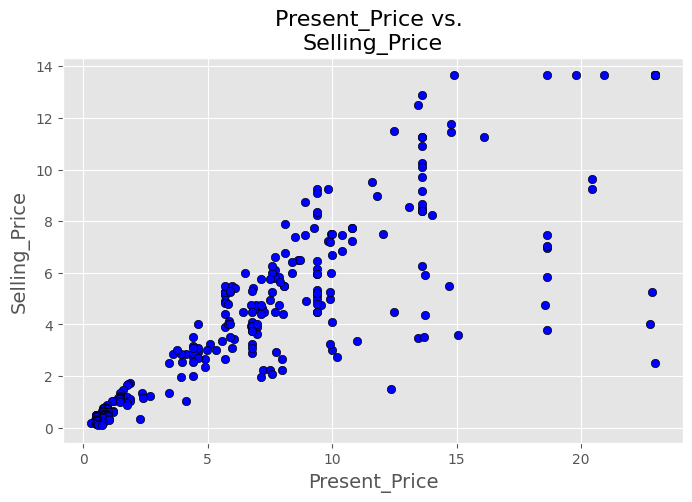

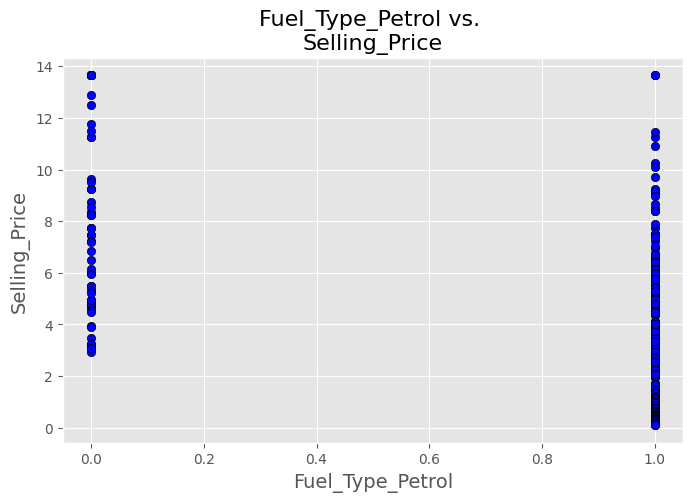

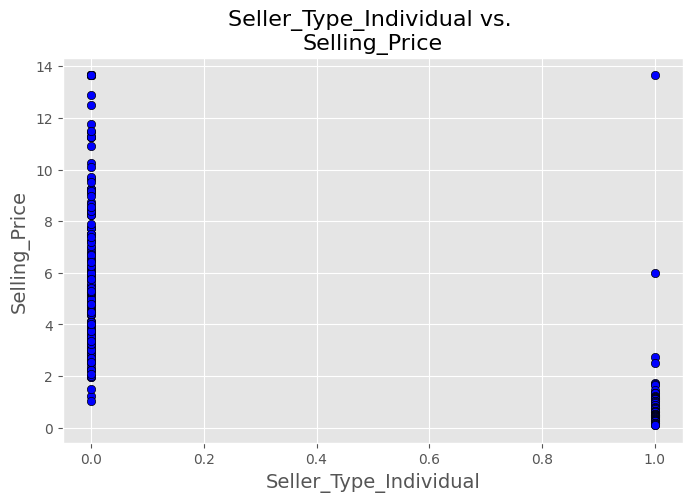

In [83]:
#Checking for the linearity 
for c in df1.columns[1:]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nSelling_Price".format(c),fontsize=16)
    plt.scatter(x=df1[c],y=df1['Selling_Price'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Selling_Price',fontsize=14)

    plt.show()

The model shows a linear relationship for the Present_Price and Selling_Price especially for the lowest prices in the range of 0-5 (Present_Price). As Present_Price increases, the variance of Selling_Price peakes dramatically especially at the highest Present_Price decreasing the quality of our linear model.

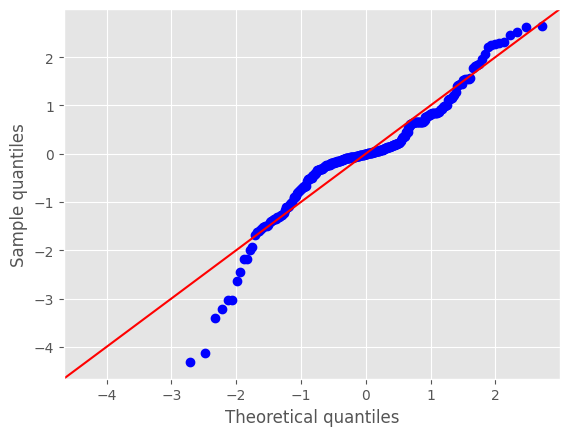

In [84]:
#Checking for Normality
from statsmodels.graphics.gofplots import qqplot
fig=qqplot(fitted.resid_pearson,line='45',fit = 'True')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.show()

The normality assumption may not hold


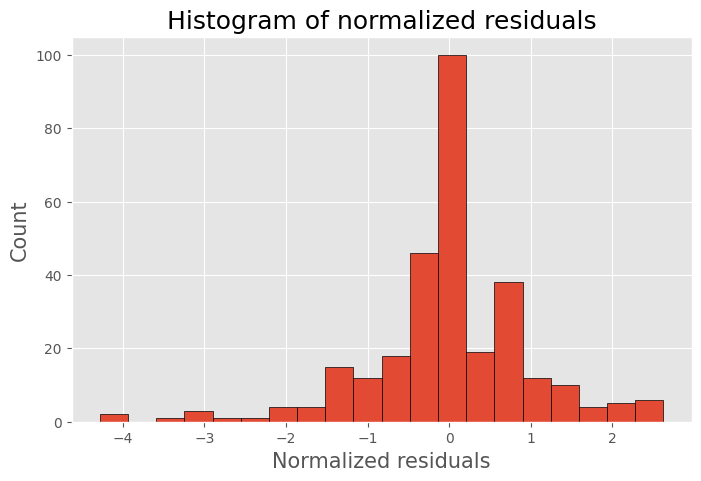

In [85]:
#Checking for Normality
from scipy.stats import shapiro
_,p=shapiro(fitted.resid)
if p>0.05:
    print("The residuals seem to come from Gaussian process")
else:
    print("The normality assumption may not hold")
    
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

The Normality assumption is violated as the left side of the Residual distribution does not follow the normal distribution, thus we can anticipate that the model might not predict well the higher values of Selling_Price.

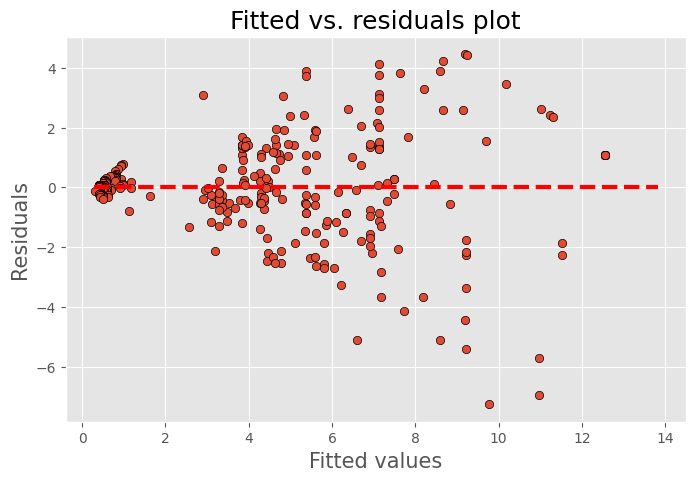

In [86]:
#Checking for Homoscedasticity
plt.figure(figsize=(8,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin=min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

A good model displays the constant variance of the residuals vs their fitted values. In our case we have there major clusters of the residuals as displayed on the X-axis: 1st cluster (0-2), 2nd cluster (3-6), and 3rd cluster (6-12) meaning that the variance of Selling_Price is increasing with the values of predictors meaning that our model might not work well at the higher values of Selling_Price.

In [87]:
#Autocorrelation
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(fitted.resid)
print(durbinWatson)

1.7836342493108048


The autocorrelation assumption is violated. The Durbin-Watson value must be outside of the 0-2 range Values from 0 to 2 show positive autocorrelation (common in time series data).

# **Conclusions:**

Cars Present_price is the most important factor for predicting the cars Selling_Price.

# **Saving the model**

In [88]:
import pickle
# open a file, where you ant to store the data
file = open('KNeighborsRegressor.pkl', 'wb')

# dump information to that file
pickle.dump(KNeighborsRegressor, file)